In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
df = pd.read_csv("ESSdata_Thinkful.csv")
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [13]:
df['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

CH


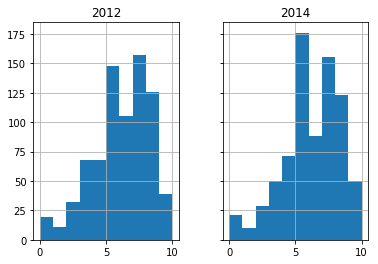

2012    5.677878
2014    5.751617
dtype: float64


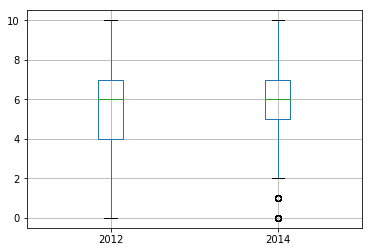

Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)
CZ


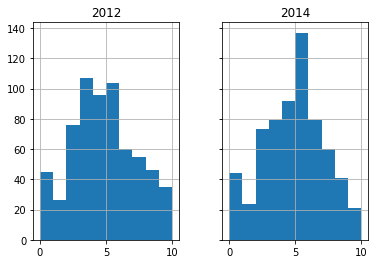

2012    4.361538
2014    4.429231
dtype: float64


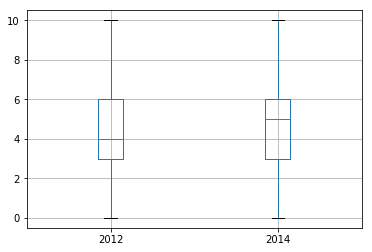

Ttest_relResult(statistic=-0.5001638336887216, pvalue=0.6171292682404208)
DE


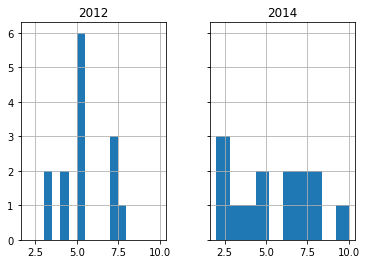

2012    5.214286
2014    5.357143
dtype: float64


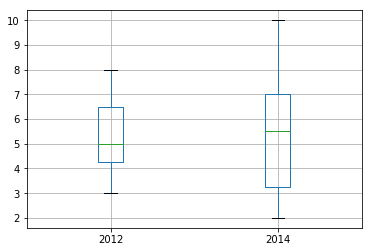

Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)
ES


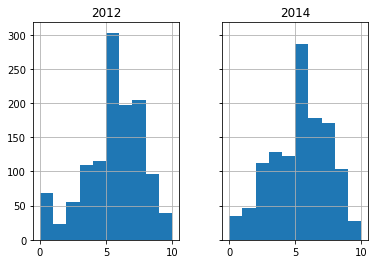

2012    5.112304
2014    4.895128
dtype: float64


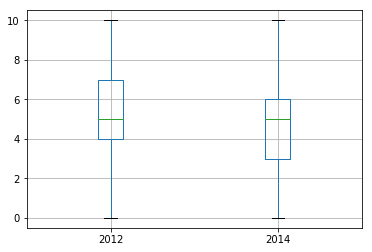

Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725321856)
NO


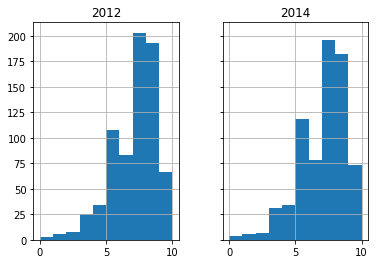

2012    6.647462
2014    6.599451
dtype: float64


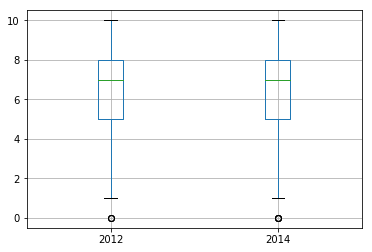

Ttest_relResult(statistic=0.5073077081124404, pvalue=0.6120925701518767)
SE


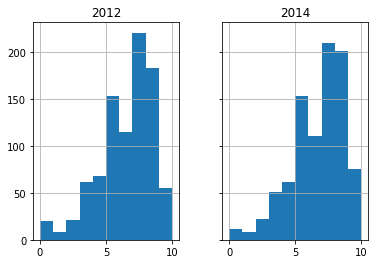

2012    6.058499
2014    6.257174
dtype: float64


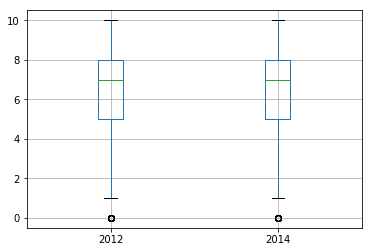

Ttest_relResult(statistic=-2.0671082026033982, pvalue=0.0390078167095776)


In [45]:
for cntry in df['cntry'].unique():
    trust = pd.DataFrame()
    print(cntry)
    trust['2012'] = (df.loc[df['cntry'] == cntry].loc[df['year'] == 6].reset_index()['ppltrst'])
    trust['2014'] = (df.loc[df['cntry'] == cntry].loc[df['year'] == 7].reset_index()['ppltrst'])
    trust = trust.dropna()
    trust.hist(sharey = True, sharex = True)
    plt.show()
    print(trust.mean())
    trust.boxplot()
    plt.show()
    print(stats.ttest_rel(trust['2012'], trust['2014']))

Sweden is significantly more trusting, and Spain is signficantly less trusting. All others experience no statistically significant change.

CH


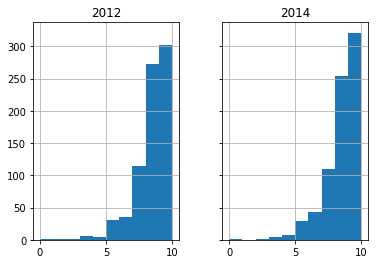

2012    6.058499
2014    6.257174
dtype: float64


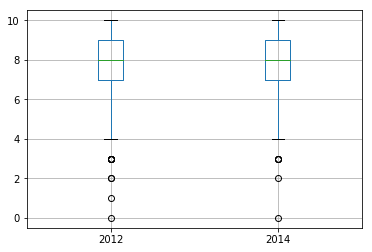

Ttest_relResult(statistic=-0.319412957862232, pvalue=0.7495001355428359)
CZ


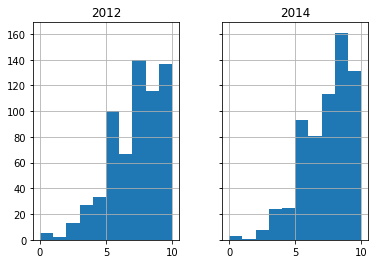

2012    6.058499
2014    6.257174
dtype: float64


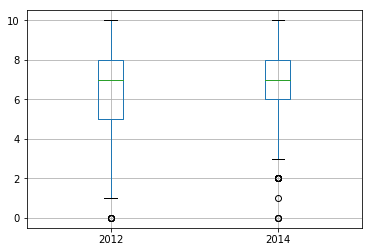

Ttest_relResult(statistic=-1.4561384833039597, pvalue=0.14584548433894534)
DE


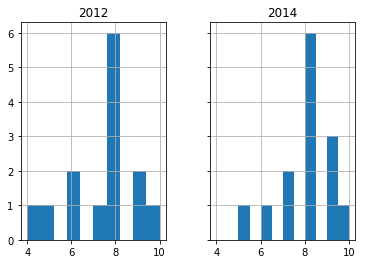

2012    6.058499
2014    6.257174
dtype: float64


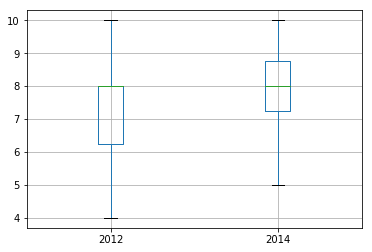

Ttest_relResult(statistic=-0.8062257748298549, pvalue=0.4346138707734991)
ES


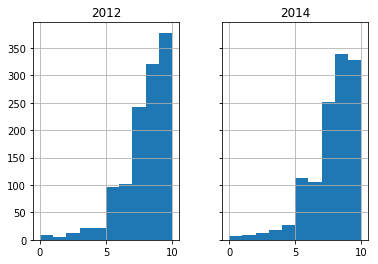

2012    6.058499
2014    6.257174
dtype: float64


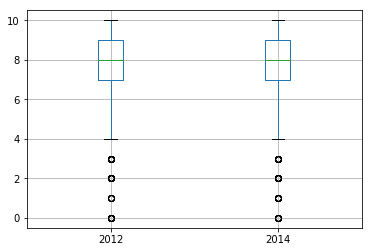

Ttest_relResult(statistic=1.613832417735418, pvalue=0.1068245155648069)
NO


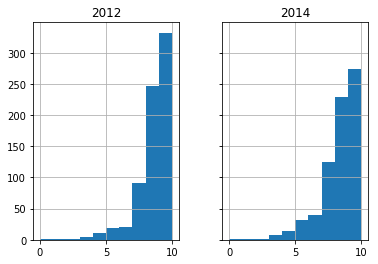

2012    6.058499
2014    6.257174
dtype: float64


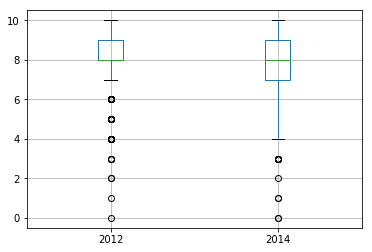

Ttest_relResult(statistic=4.2856826576235925, pvalue=2.0674530134057013e-05)
SE


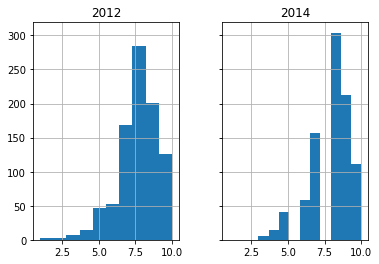

2012    6.058499
2014    6.257174
dtype: float64


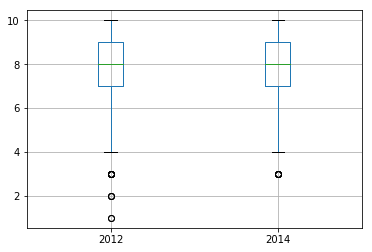

Ttest_relResult(statistic=-0.5581637086030012, pvalue=0.5768709591234161)


In [46]:
for cntry in df['cntry'].unique():
    happy = pd.DataFrame()
    print(cntry)
    happy['2012'] = (df.loc[df['cntry'] == cntry].loc[df['year'] == 6].reset_index()['happy'])
    happy['2014'] = (df.loc[df['cntry'] == cntry].loc[df['year'] == 7].reset_index()['happy'])
    happy = happy.dropna()
    happy.hist(sharey = True, sharex = True)
    plt.show()
    print(trust.mean())
    happy.boxplot()
    plt.show()
    print(stats.ttest_rel(happy['2012'], happy['2014']))

Norwegians are significantly more happy in 2014. Everyone else does not change to a statistically significant degree.

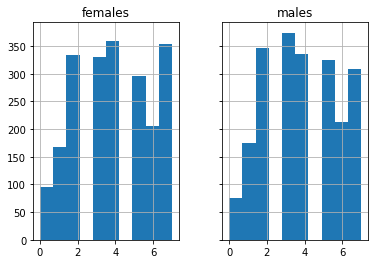

males      3.901906
females    3.944393
dtype: float64


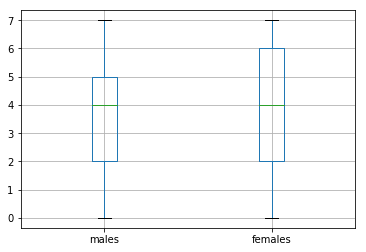

Ttest_indResult(statistic=-0.6899928109209502, pvalue=0.4902360402696986)


In [56]:
tvtime = pd.DataFrame()
tvtime['males'] = df.loc[df['gndr'] == 1.0].loc[df['year'] == 6].reset_index()['tvtot']
tvtime['females'] = df.loc[df['gndr'] == 2.0].loc[df['year'] == 6].reset_index()['tvtot']
tvtime.hist(sharey = True, sharex = True)
plt.show()
print(tvtime.mean())
tvtime.boxplot()
plt.show()
print(stats.ttest_ind(tvtime['males'].dropna(), tvtime['females'].dropna()))

No statistically significant difference between the reported TV watch time of males and females.

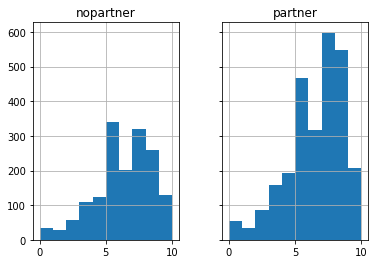

partner      6.080736
nopartner    5.856965
dtype: float64


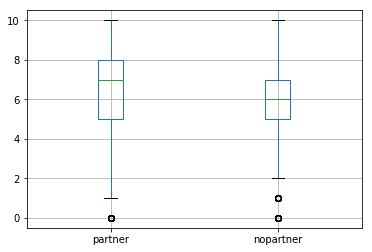

Ttest_indResult(statistic=3.3201033970362084, pvalue=0.0009073952609883756)


In [58]:
fairness = pd.DataFrame()
fairness['partner'] = df.loc[df['partner'] == 1.0].loc[df['year'] == 6].reset_index()['pplfair']
fairness['nopartner'] = df.loc[df['partner'] == 2.0].loc[df['year'] == 6].reset_index()['pplfair']
fairness.hist(sharey = True, sharex = True)
plt.show()
print(fairness.mean())
fairness.boxplot()
plt.show()
print(stats.ttest_ind(fairness['partner'].dropna(), fairness['nopartner'].dropna()))

In 2012, those with a partner were significantly more presisposed towards rating people as fairer.

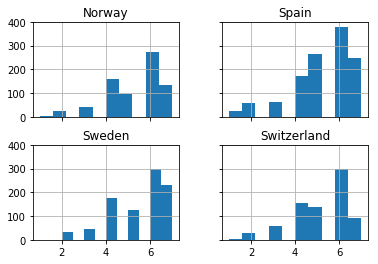

Spain          5.260116
Sweden         5.426211
Norway         5.302326
Switzerland    5.160622
dtype: float64


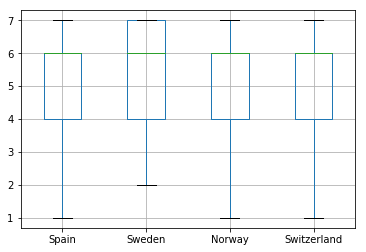

0.001106621438920195
Spain vs Sweden
Ttest_indResult(statistic=-2.649547268580078, pvalue=0.00811992279651295)
Spain vs Norway
Ttest_indResult(statistic=-0.632916395870007, pvalue=0.5268628350318294)
Spain vs Switzerland
Ttest_indResult(statistic=1.5343317353073618, pvalue=0.12510774525042745)
Sweden vs Spain
Ttest_indResult(statistic=2.649547268580078, pvalue=0.00811992279651295)
Sweden vs Norway
Ttest_indResult(statistic=1.8305856428076237, pvalue=0.06734412432597783)
Sweden vs Switzerland
Ttest_indResult(statistic=4.037131044403062, pvalue=5.654598600313532e-05)
Norway vs Spain
Ttest_indResult(statistic=0.632916395870007, pvalue=0.5268628350318294)
Norway vs Sweden
Ttest_indResult(statistic=-1.8305856428076237, pvalue=0.06734412432597783)
Norway vs Switzerland
Ttest_indResult(statistic=2.067962986557216, pvalue=0.03881448528868391)
Switzerland vs Spain
Ttest_indResult(statistic=-1.5343317353073618, pvalue=0.12510774525042745)
Switzerland vs Sweden
Ttest_indResult(statistic=-4.037131

In [68]:
pplmeet = pd.DataFrame()
pplmeet['Spain'] = df.loc[df['cntry'] == 'ES'].loc[df['year'] == 7].reset_index()['sclmeet']
pplmeet['Sweden'] = df.loc[df['cntry'] == 'SE'].loc[df['year'] == 7].reset_index()['sclmeet']
pplmeet['Norway'] = df.loc[df['cntry'] == 'NO'].loc[df['year'] == 7].reset_index()['sclmeet']
pplmeet['Switzerland'] = df.loc[df['cntry'] == 'CH'].loc[df['year'] == 7].reset_index()['sclmeet']
pplmeet.hist(sharey = True, sharex = True)
plt.show()
print(pplmeet.mean())
pplmeet.boxplot()
plt.show()
F, p = stats.f_oneway(
    pplmeet['Spain'].dropna(),
    pplmeet['Sweden'].dropna(),
    pplmeet['Norway'].dropna(),
    pplmeet['Switzerland'].dropna())
print(p)
countries = ['Spain', 'Sweden', 'Norway', 'Switzerland']
for cntry1 in countries:
    for cntry2 in countries:
        if cntry1 != cntry2:
            print(cntry1 + " vs " + cntry2)
            print(stats.ttest_ind(pplmeet[cntry1].dropna(), pplmeet[cntry2].dropna()))

Sweden is different from Switzerland and Spain with statistical significance. Switzerland and Norway are also statistically significantly different. Sweden being signicantly more sociable than all but Norway, and Norway being significantly more sociable than only Switzerland.

66
68
63
60


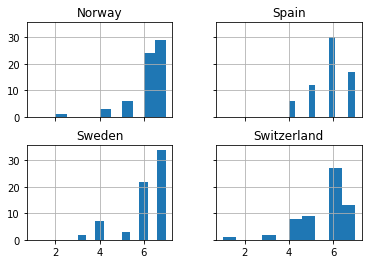

Sweden         6.161765
Spain          5.892308
Norway         6.206349
Switzerland    5.616667
dtype: float64


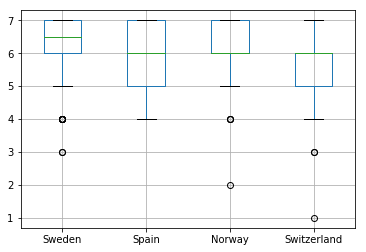

0.006908460506898246
Spain vs Sweden
Ttest_indResult(statistic=-1.5389479250348466, pvalue=0.126229011990158)
Spain vs Norway
Ttest_indResult(statistic=-1.8792964303803592, pvalue=0.06251394122220814)
Spain vs Switzerland
Ttest_indResult(statistic=1.4409355461276638, pvalue=0.15214376373422675)
Sweden vs Spain
Ttest_indResult(statistic=1.5389479250348466, pvalue=0.126229011990158)
Sweden vs Norway
Ttest_indResult(statistic=-0.24340597885855314, pvalue=0.808077555136068)
Sweden vs Switzerland
Ttest_indResult(statistic=2.6541365290519487, pvalue=0.008976273946059253)
Norway vs Spain
Ttest_indResult(statistic=1.8792964303803592, pvalue=0.06251394122220814)
Norway vs Sweden
Ttest_indResult(statistic=0.24340597885855314, pvalue=0.808077555136068)
Norway vs Switzerland
Ttest_indResult(statistic=2.950800923081422, pvalue=0.003806837287895911)
Switzerland vs Spain
Ttest_indResult(statistic=-1.4409355461276638, pvalue=0.15214376373422675)
Switzerland vs Sweden
Ttest_indResult(statistic=-2.65413

In [75]:
pplmeet = pd.DataFrame()
df_young = df.loc[df['agea'] < 20]
print(len(df_young.loc[df_young['cntry'] == 'ES'].loc[df_young['year'] == 7].reset_index()['sclmeet']))
print(len(df_young.loc[df_young['cntry'] == 'SE'].loc[df_young['year'] == 7].reset_index()['sclmeet']))
print(len(df_young.loc[df_young['cntry'] == 'NO'].loc[df_young['year'] == 7].reset_index()['sclmeet']))
print(len(df_young.loc[df_young['cntry'] == 'CH'].loc[df_young['year'] == 7].reset_index()['sclmeet']))


pplmeet['Sweden'] = df_young.loc[df_young['cntry'] == 'SE'].loc[df_young['year'] == 7].reset_index()['sclmeet']
pplmeet['Spain'] = df_young.loc[df_young['cntry'] == 'ES'].loc[df_young['year'] == 7].reset_index()['sclmeet']
pplmeet['Norway'] = df_young.loc[df_young['cntry'] == 'NO'].loc[df_young['year'] == 7].reset_index()['sclmeet']
pplmeet['Switzerland'] = df_young.loc[df_young['cntry'] == 'CH'].loc[df_young['year'] == 7].reset_index()['sclmeet']
pplmeet.hist(sharey = True, sharex = True)
plt.show()
print(pplmeet.mean())
pplmeet.boxplot()
plt.show()
F, p = stats.f_oneway(
    pplmeet['Spain'].dropna(),
    pplmeet['Sweden'].dropna(),
    pplmeet['Norway'].dropna(),
    pplmeet['Switzerland'].dropna())
print(p)
countries = ['Spain', 'Sweden', 'Norway', 'Switzerland']
for cntry1 in countries:
    for cntry2 in countries:
        if cntry1 != cntry2:
            print(cntry1 + " vs " + cntry2)
            print(stats.ttest_ind(pplmeet[cntry1].dropna(), pplmeet[cntry2].dropna()))

People under the age of 20 in Switzerland are significantly less social than those their age in the other countries.

330
224
184
236


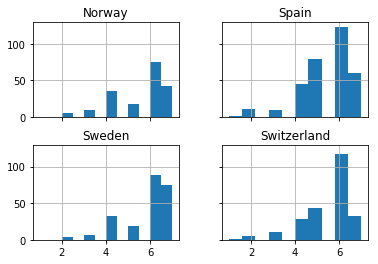

Spain          5.428571
Sweden         5.812500
Norway         5.494565
Switzerland    5.483051
dtype: float64


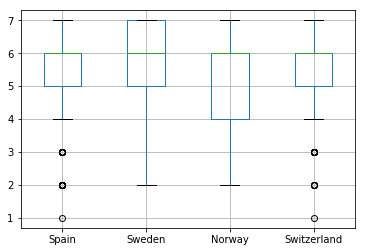

0.002486450490913877
Spain vs Sweden
Ttest_indResult(statistic=-3.6009852891602723, pvalue=0.00034564570180985773)
Spain vs Norway
Ttest_indResult(statistic=-0.5671083553226028, pvalue=0.5708895965425465)
Spain vs Switzerland
Ttest_indResult(statistic=-0.5287028439280946, pvalue=0.5972199626624795)
Sweden vs Spain
Ttest_indResult(statistic=3.6009852891602723, pvalue=0.00034564570180985773)
Sweden vs Norway
Ttest_indResult(statistic=2.5330715250115725, pvalue=0.011682348130556264)
Sweden vs Switzerland
Ttest_indResult(statistic=2.962188246278843, pvalue=0.0032135124047861854)
Norway vs Spain
Ttest_indResult(statistic=0.5671083553226028, pvalue=0.5708895965425465)
Norway vs Sweden
Ttest_indResult(statistic=-2.5330715250115725, pvalue=0.011682348130556264)
Norway vs Switzerland
Ttest_indResult(statistic=0.09514628921710691, pvalue=0.9242442258649847)
Switzerland vs Spain
Ttest_indResult(statistic=0.5287028439280946, pvalue=0.5972199626624795)
Switzerland vs Sweden
Ttest_indResult(statisti

In [77]:
pplmeet = pd.DataFrame()
df_young = df.loc[df['agea'] < 40].loc[df['agea'] > 20]
print(len(df_young.loc[df_young['cntry'] == 'ES'].loc[df_young['year'] == 7].reset_index()['sclmeet']))
print(len(df_young.loc[df_young['cntry'] == 'SE'].loc[df_young['year'] == 7].reset_index()['sclmeet']))
print(len(df_young.loc[df_young['cntry'] == 'NO'].loc[df_young['year'] == 7].reset_index()['sclmeet']))
print(len(df_young.loc[df_young['cntry'] == 'CH'].loc[df_young['year'] == 7].reset_index()['sclmeet']))


pplmeet['Spain'] = df_young.loc[df_young['cntry'] == 'ES'].loc[df_young['year'] == 7].reset_index()['sclmeet']
pplmeet['Sweden'] = df_young.loc[df_young['cntry'] == 'SE'].loc[df_young['year'] == 7].reset_index()['sclmeet']
pplmeet['Norway'] = df_young.loc[df_young['cntry'] == 'NO'].loc[df_young['year'] == 7].reset_index()['sclmeet']
pplmeet['Switzerland'] = df_young.loc[df_young['cntry'] == 'CH'].loc[df_young['year'] == 7].reset_index()['sclmeet']
pplmeet.hist(sharey = True, sharex = True)
plt.show()
print(pplmeet.mean())
pplmeet.boxplot()
plt.show()
F, p = stats.f_oneway(
    pplmeet['Spain'].dropna(),
    pplmeet['Sweden'].dropna(),
    pplmeet['Norway'].dropna(),
    pplmeet['Switzerland'].dropna())
print(p)
countries = ['Spain', 'Sweden', 'Norway', 'Switzerland']
for cntry1 in countries:
    for cntry2 in countries:
        if cntry1 != cntry2:
            print(cntry1 + " vs " + cntry2)
            print(stats.ttest_ind(pplmeet[cntry1].dropna(), pplmeet[cntry2].dropna()))

Those between the ages of 20 and 40 in Sweden are significantly more social than those their age in the other countries.

416
257
256
230


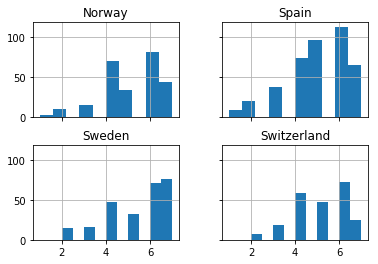

Spain          4.992788
Sweden         5.385214
Norway         5.121094
Switzerland    5.026201
dtype: float64


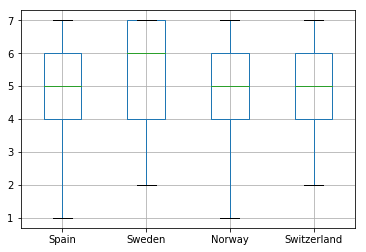

0.004765836029063298
Spain vs Sweden
Ttest_indResult(statistic=-3.301676340601238, pvalue=0.0010120331325598547)
Spain vs Norway
Ttest_indResult(statistic=-1.1062817219978966, pvalue=0.26900165426241845)
Spain vs Switzerland
Ttest_indResult(statistic=-0.2868147832704797, pvalue=0.7743465382464766)
Sweden vs Spain
Ttest_indResult(statistic=3.301676340601238, pvalue=0.0010120331325598547)
Sweden vs Norway
Ttest_indResult(statistic=2.049762965074543, pvalue=0.04089742616462174)
Sweden vs Switzerland
Ttest_indResult(statistic=2.821845447028855, pvalue=0.004971229564433552)
Norway vs Spain
Ttest_indResult(statistic=1.1062817219978966, pvalue=0.26900165426241845)
Norway vs Sweden
Ttest_indResult(statistic=-2.049762965074543, pvalue=0.04089742616462174)
Norway vs Switzerland
Ttest_indResult(statistic=0.7768600620891412, pvalue=0.43762162373903546)
Switzerland vs Spain
Ttest_indResult(statistic=0.2868147832704797, pvalue=0.7743465382464766)
Switzerland vs Sweden
Ttest_indResult(statistic=-2.82

In [79]:
pplmeet = pd.DataFrame()
df_young = df.loc[df['agea'] < 60].loc[df['agea'] > 40]
print(len(df_young.loc[df_young['cntry'] == 'ES'].loc[df_young['year'] == 7].reset_index()['sclmeet']))
print(len(df_young.loc[df_young['cntry'] == 'SE'].loc[df_young['year'] == 7].reset_index()['sclmeet']))
print(len(df_young.loc[df_young['cntry'] == 'NO'].loc[df_young['year'] == 7].reset_index()['sclmeet']))
print(len(df_young.loc[df_young['cntry'] == 'CH'].loc[df_young['year'] == 7].reset_index()['sclmeet']))


pplmeet['Spain'] = df_young.loc[df_young['cntry'] == 'ES'].loc[df_young['year'] == 7].reset_index()['sclmeet']
pplmeet['Sweden'] = df_young.loc[df_young['cntry'] == 'SE'].loc[df_young['year'] == 7].reset_index()['sclmeet']
pplmeet['Norway'] = df_young.loc[df_young['cntry'] == 'NO'].loc[df_young['year'] == 7].reset_index()['sclmeet']
pplmeet['Switzerland'] = df_young.loc[df_young['cntry'] == 'CH'].loc[df_young['year'] == 7].reset_index()['sclmeet']
pplmeet.hist(sharey = True, sharex = True)
plt.show()
print(pplmeet.mean())
pplmeet.boxplot()
plt.show()
F, p = stats.f_oneway(
    pplmeet['Spain'].dropna(),
    pplmeet['Sweden'].dropna(),
    pplmeet['Norway'].dropna(),
    pplmeet['Switzerland'].dropna())
print(p)
countries = ['Spain', 'Sweden', 'Norway', 'Switzerland']
for cntry1 in countries:
    for cntry2 in countries:
        if cntry1 != cntry2:
            print(cntry1 + " vs " + cntry2)
            print(stats.ttest_ind(pplmeet[cntry1].dropna(), pplmeet[cntry2].dropna()))

Once again, those in Sweden between the ages of 40 and 60 are significantly more social than those their age in the other countries.

312
301
181
187


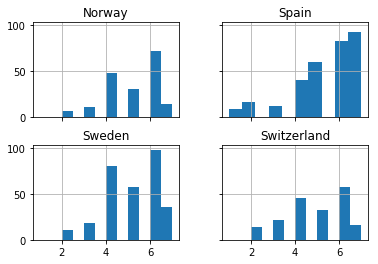

Spain          5.381410
Sweden         5.069767
Norway         5.066298
Switzerland    4.770053
dtype: float64


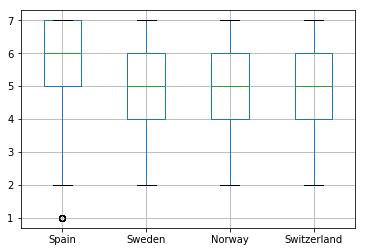

4.263127511216108e-05
Spain vs Sweden
Ttest_indResult(statistic=2.672198675073295, pvalue=0.007736656966916139)
Spain vs Norway
Ttest_indResult(statistic=2.300966080189318, pvalue=0.021811637612373622)
Spain vs Switzerland
Ttest_indResult(statistic=4.340682267513907, pvalue=1.721823540628473e-05)
Sweden vs Spain
Ttest_indResult(statistic=-2.672198675073295, pvalue=0.007736656966916139)
Sweden vs Norway
Ttest_indResult(statistic=0.029219963082324496, pvalue=0.9767013045906187)
Sweden vs Switzerland
Ttest_indResult(statistic=2.416031826007847, pvalue=0.01605835667244703)
Norway vs Spain
Ttest_indResult(statistic=-2.300966080189318, pvalue=0.021811637612373622)
Norway vs Sweden
Ttest_indResult(statistic=-0.029219963082324496, pvalue=0.9767013045906187)
Norway vs Switzerland
Ttest_indResult(statistic=2.141301676905436, pvalue=0.03290961177355089)
Switzerland vs Spain
Ttest_indResult(statistic=-4.340682267513907, pvalue=1.721823540628473e-05)
Switzerland vs Sweden
Ttest_indResult(statistic=

In [80]:
pplmeet = pd.DataFrame()
df_young = df.loc[df['agea'] > 60]
print(len(df_young.loc[df_young['cntry'] == 'ES'].loc[df_young['year'] == 7].reset_index()['sclmeet']))
print(len(df_young.loc[df_young['cntry'] == 'SE'].loc[df_young['year'] == 7].reset_index()['sclmeet']))
print(len(df_young.loc[df_young['cntry'] == 'NO'].loc[df_young['year'] == 7].reset_index()['sclmeet']))
print(len(df_young.loc[df_young['cntry'] == 'CH'].loc[df_young['year'] == 7].reset_index()['sclmeet']))


pplmeet['Spain'] = df_young.loc[df_young['cntry'] == 'ES'].loc[df_young['year'] == 7].reset_index()['sclmeet']
pplmeet['Sweden'] = df_young.loc[df_young['cntry'] == 'SE'].loc[df_young['year'] == 7].reset_index()['sclmeet']
pplmeet['Norway'] = df_young.loc[df_young['cntry'] == 'NO'].loc[df_young['year'] == 7].reset_index()['sclmeet']
pplmeet['Switzerland'] = df_young.loc[df_young['cntry'] == 'CH'].loc[df_young['year'] == 7].reset_index()['sclmeet']
pplmeet.hist(sharey = True, sharex = True)
plt.show()
print(pplmeet.mean())
pplmeet.boxplot()
plt.show()
F, p = stats.f_oneway(
    pplmeet['Spain'].dropna(),
    pplmeet['Sweden'].dropna(),
    pplmeet['Norway'].dropna(),
    pplmeet['Switzerland'].dropna())
print(p)
countries = ['Spain', 'Sweden', 'Norway', 'Switzerland']
for cntry1 in countries:
    for cntry2 in countries:
        if cntry1 != cntry2:
            print(cntry1 + " vs " + cntry2)
            print(stats.ttest_ind(pplmeet[cntry1].dropna(), pplmeet[cntry2].dropna()))